# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import cohen_kappa_score

# Loading and cleaning the dataset

In [26]:
df = pd.DataFrame(pd.read_csv("Updated_Data.csv"))
del df[df.columns[0]]

In [27]:
df.head(5)

,datetime_local,short_title,popularity,score,Venue_id,latitude,longitude,Venue_name,average_price,highest_price,...,TaxiCount,LocationID,Month,DayofMonth,Hour,Temp_Avg,Conditions,Conditions2,timestamp,weekday
0,2017-07-05 14:00:00,Dear Evan Hansen - New York,0.000000,0.604179,3298,40.6971,-73.9796,Music Box Theatre,759.0,1126,...,33,65,7,5,14,82.4,Mostly Cloudy,4,7/5/2017 14:00,2
1,2017-07-05 14:00:00,"Hello, Dolly! - New York",0.692593,0.588942,3187,40.6971,-73.9796,Shubert Theatre,1007.0,1884,...,33,65,7,5,14,82.4,Mostly Cloudy,4,7/5/2017 14:00,2
2,2017-07-05 20:00:00,"Hello, Dolly! - New York",0.660295,0.647096,3187,40.6971,-73.9796,Shubert Theatre,972.5,1884,...,27,65,7,5,20,73.4,Clear,0,7/5/2017 20:00,2
3,2017-07-05 20:00:00,Dear Evan Hansen - New York,0.000000,0.601474,3298,40.6971,-73.9796,Music Box Theatre,668.0,825,...,27,65,7,5,20,73.4,Clear,0,7/5/2017 20:00,2
4,2017-07-05 23:00:00,Beatbreaker - New York,0.000000,0.452016,41977,40.7028,-73.9903,Marquee New York,0.0,0,...,18,66,7,5,23,73.4,Partly Cloudy,5,7/5/2017 23:00,2


In [28]:
newdf = df.dropna()

In [29]:
newdf.shape

(1814, 25)

In [30]:
newdf['popularity'] = (newdf['popularity']*100).astype(int)
newdf['score'] = (newdf['score']*100).astype(int)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#Backing up
data = newdf
data.columns

Index([u'datetime_local', u'short_title', u'popularity', u'score', u'Venue_id',
       u'latitude', u'longitude', u'Venue_name', u'average_price',
       u'highest_price', u'listing_count', u'lowest_price',
       u'lowest_price_good_deals', u'type', u'type2', u'TaxiCount',
       u'LocationID', u'Month', u'DayofMonth', u'Hour', u'Temp_Avg',
       u'Conditions', u'Conditions2', u'timestamp', u'weekday'],
      dtype='object')

# Creating training and testing data sets

In [32]:
X = data[['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','weekday','Month','DayofMonth','Hour']].astype(int)
Y = data['TaxiCount']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.90)

# Creating the Model

In [33]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
clf2 = RandomForestClassifier(n_estimators= 1000)
clf2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
clf3 = LogisticRegression()
clf3.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

# Results after prediction

In [37]:
actual_values = Y_test.reset_index()
del actual_values['index']
total = actual_values.shape[0]

In [38]:
t1 = 0
t2 = 0
t3 = 0

for i in range(len(pred1)):
    if(abs(pred1[i] - actual_values['TaxiCount'][i])) <= 10:
        t1 = t1 + 1
    if(abs(pred2[i] - actual_values['TaxiCount'][i])) <= 10:
        t2 = t2 + 1
    if(abs(pred3[i] - actual_values['TaxiCount'][i])) <= 10:
        t3 = t3 + 1
print ("DecisionTreeClassifier",t1, "Total", total)
print ("RandomForestClassifier",t2, "Total", total)
print ("LogisticRegression",t3, "Total", total)

('DecisionTreeClassifier', 170, 'Total', 182)
('RandomForestClassifier', 171, 'Total', 182)
('LogisticRegression', 122, 'Total', 182)


##### Random Forest Classifier correctly predicts the count of taxis for 171 events out of 182
##### Decision Tree Classifier correctly predicts the count of taxis for 170 events out of 18
##### Logistic Regression correctly predicts the count of taxis for 122 events out of 182

In [39]:
cohen_kappa_score(pred2, actual_values)

0.91641407182878665

# Enhancing the model using Grid Search CV

In [40]:
rfc = RandomForestClassifier(n_jobs=-1,max_features='auto',n_estimators=1000, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 2000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc,scoring='accuracy',param_grid=param_grid, cv=5)
CV_rfc.fit(X_train,Y_train)
print CV_rfc.best_params_
print '\n',CV_rfc.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'max_features': 'auto', 'n_estimators': 2000}

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [41]:
dtc=DecisionTreeClassifier()
n_estimators = range(50, 400, 50)

parameters={
    "min_samples_split": [2, 10, 20],
    "max_depth": [None, 2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_leaf_nodes": [None, 5, 10, 20]
}

CV_dtc=GridSearchCV(estimator=dtc,scoring='accuracy',param_grid=parameters,cv=5)
CV_dtc.fit(X_train,Y_train)
print CV_dtc.best_params_
print CV_dtc.best_estimator_

{'min_samples_split': 2, 'max_leaf_nodes': None, 'max_depth': None, 'min_samples_leaf': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [42]:
lr = LogisticRegression()
lr_param_grid = {'C':[0.001,0.01,0.1,1,10,1000]}

#param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options)
CV_lr = GridSearchCV(lr, lr_param_grid, cv = 5, scoring = 'accuracy')
CV_lr.fit(X_train, Y_train)
print CV_lr.best_params_
print '\n',CV_lr.best_estimator_

{'C': 1000}

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Creating the model using optimal parameters

In [48]:
rfc_cv = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
rfc_cv.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
lr_cv = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_cv.fit(X_train, Y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
dtc_cv = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dtc_cv.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
rfc_pred = rfc_cv.predict(X_test)
lr_pred = lr_cv.predict(X_test)
dtc_pred = dtc_cv.predict(X_test)

In [61]:
tlr = 0
trfc = 0
tdtc = 0
for i in range(len(rfc_pred)):
    if(abs(rfc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        trfc = trfc + 1
    if(abs(lr_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        tlr = tlr + 1
    if(abs(dtc_pred[i] - actual_values['TaxiCount'][i])) <= 10:
        tdtc = tdtc + 1

print ("DecisionTreeClassifier",tdtc, "Total", total)
print ("RandomForestClassifier",trfc, "Total", total)
print ("LogisticRegression",tlr, "Total", total)

('DecisionTreeClassifier', 169, 'Total', 182)
('RandomForestClassifier', 171, 'Total', 182)
('LogisticRegression', 129, 'Total', 182)


#### As we see from the results, Random Forest gives the best result after Grid Search CV.

# Comparison of Actual vs Predicted Values

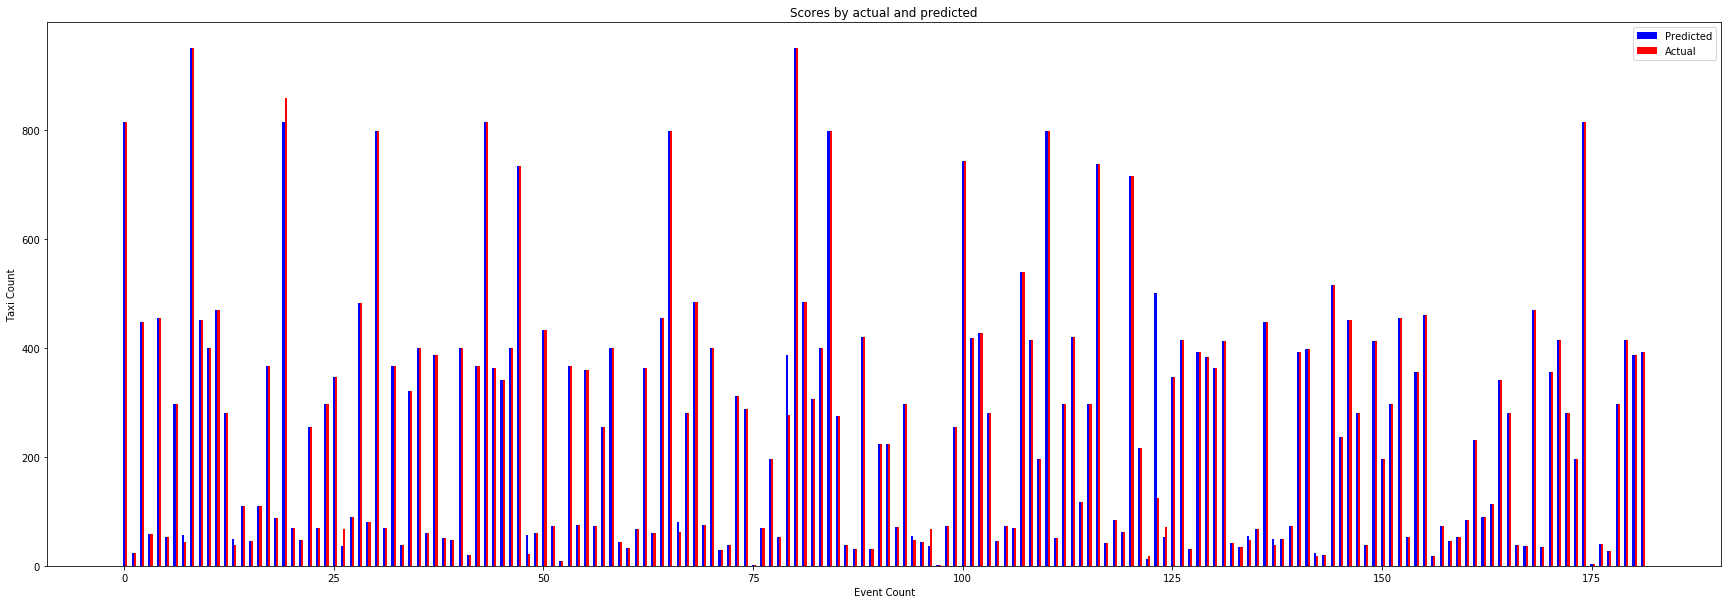

In [62]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 182

means_men = rfc_pred

means_women = actual_values['TaxiCount']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
rects1 = plt.bar(index, means_men, bar_width, 
                 color='b',
                 label='Predicted')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 color='r',
                 label='Actual')

plt.xlabel('Event Count')
plt.ylabel('Taxi Count')
plt.title('Scores by actual and predicted')
plt.legend()
plt.rcParams["figure.figsize"] = (20, 20)
plt.show(fig)

# Checking how much Every parameter contributes

In [58]:
rfc_cv.feature_importances_

array([ 0.03031213,  0.05190735,  0.04124796,  0.06495913,  0.04275872,
        0.04854483,  0.05850415,  0.04360269,  0.01973246,  0.14125974,
        0.05244765,  0.08198451,  0.06962785,  0.05698675,  0.11130952,
        0.08481457])

In [59]:
n_groups1 = len(rfc_cv.feature_importances_)
values = rfc_cv.feature_importances_
index1 = ['popularity','score','Venue_id','average_price','highest_price','lowest_price','listing_count','lowest_price_good_deals','type2','Temp_Avg','Conditions2','LocationID','weekday','Month','DayofMonth','Hour']

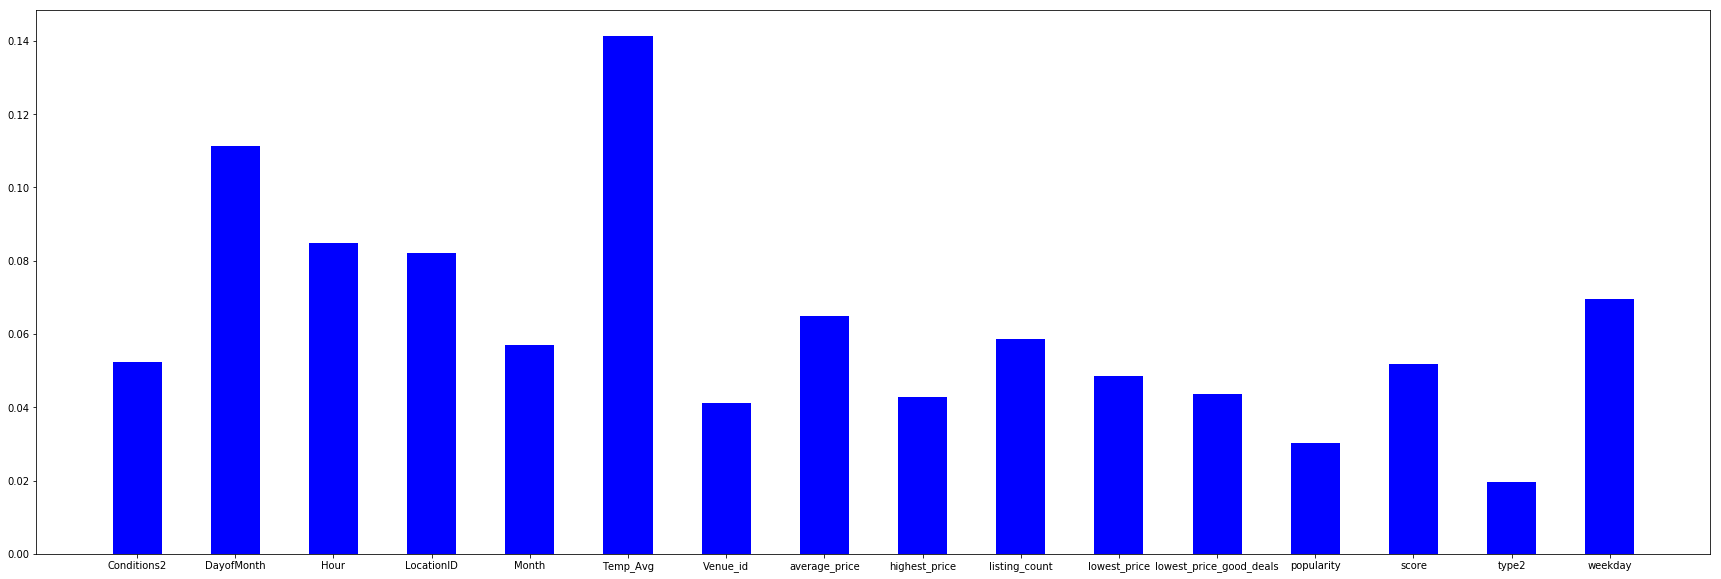

In [64]:
bar_width = 0.5
fig, ax = plt.subplots()
opacity = 0.4
rects3 = plt.bar(index1, values, bar_width, 
                 color='b',
                 label='Feature Importance')
plt.show(fig)
plt.rcParams["figure.figsize"] = (30, 10)